In [2]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [3]:
import mdtraj as md
import seaborn as sns

## Load HMM

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [5]:
from scipy.stats import skew, kurtosis

In [6]:
HMM = pickle.load(open('Data/Chodera_data/Processed/HMM_lag1.0.pickle', 'rb'))

In [7]:
stat_dist = HMM.stationary_distribution_obs

In [37]:
membership = HMM.metastable_assignments
n_sets = HMM.nstates

## Calculate scaled free energy 

In [42]:
free_energy = -np.log(stat_dist)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
free_energy_scaled = scaler.fit_transform(free_energy[:, np.newaxis])

In [43]:
stat_dist_by_state = [stat_dist[np.where(membership==i)[0]] for i in range(n_sets)]
free_energy_by_state = [free_energy_scaled[np.where(membership==i)[0]] for i in range(n_sets)]

In [45]:
volume_by_state = [np.sum(free_energy[np.where(membership==i)[0]]) for i in range(n_sets)]

[332.66772843538098,
 676.98751182944409,
 1075.3398124079658,
 1453.0340247313493]

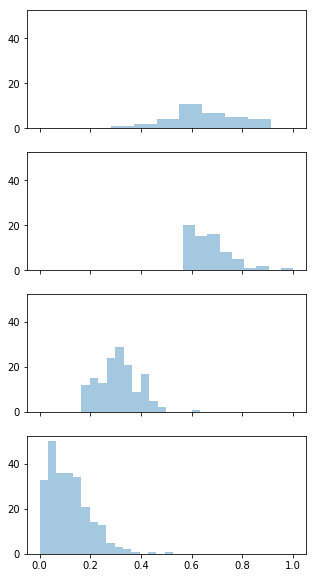

In [40]:
fig, axes = plt.subplots(n_sets, sharex=True, sharey=True, figsize=(5,10))
tol = 1e-7
for i, ax in enumerate(axes):
#     ax.hist(free_energy_by_state[i], bins=10)
    sns.distplot(free_energy_by_state[i], ax=ax, kde=False)

## Calculate properties

In [47]:
properties = {}
properties['mean'] = [np.mean(x) for x in free_energy_by_state]
properties['max'] = [np.max(x) for x in free_energy_by_state]
properties['min'] = [np.min(x) for x in free_energy_by_state]
properties['std'] = [np.std(x) for x in free_energy_by_state]
properties['skew'] = [skew(x)[0] for x in free_energy_by_state]
properties['kurtosis'] = [kurtosis(x)[0] for x in free_energy_by_state]
properties['volume'] = volume_by_state
properties

{'kurtosis': [0.36622107154810202,
  2.6875545353416799,
  0.7540433289221129,
  2.4517363862443888],
 'max': [0.91288394444303023,
  0.99999999999999989,
  0.63468555834230889,
  0.52686116490710477],
 'mean': [0.64755935327586922,
  0.67042194248257503,
  0.31152795214688855,
  0.11757398897295078],
 'min': [0.28095960464154757, 0.56550951700446761, 0.16381707010746593, 0.0],
 'skew': [-0.19540249659778985,
  1.3696788462249863,
  0.45748432904737513,
  1.2553101419550896],
 'std': [0.13606421114774128,
  0.082602401853688223,
  0.078843010510317252,
  0.082516293660893997],
 'volume': [332.66772843538098,
  676.98751182944409,
  1075.3398124079658,
  1453.0340247313493]}

In [48]:
scaled_properties = {}
for k, v in properties.items():
    scaled_properties[k] = [x[0] for x in scaler.fit_transform(np.array(v).reshape(-1,1))]
    
scaled_properties

{'kurtosis': [0.0, 1.0, 0.16706874019737891, 0.89841263533421378],
 'max': [0.81587633672077353, 0.99999999999999978, 0.22789165766541664, 0.0],
 'mean': [0.95864579209967582, 1.0, 0.35082695331088232, 0.0],
 'min': [0.49682559920442143, 1.0, 0.2896804831423761, 0.0],
 'skew': [0.0, 1.0, 0.4171583979575274, 0.92692475391494888],
 'std': [1.0000000000000002, 0.065699274071369995, 0.0, 0.064194443836509407],
 'volume': [0.0, 0.30732786637050336, 0.66288327882401099, 1.0]}

In [50]:
scaled_properties = {}
for k, v in properties.items():
    signs = np.sign(v)
    v = np.abs(v)
    scaled_v = np.array(v)/np.max(v)
    scaled_v = scaled_v*signs
    scaled_properties[k] = list(scaled_v)
scaled_properties

{'kurtosis': [0.13626554056196774,
  1.0,
  0.28056856856534385,
  0.91225549249466276],
 'max': [0.91288394444303034, 1.0, 0.634685558342309, 0.52686116490710488],
 'mean': [0.96589820863850973, 1.0, 0.46467445709384059, 0.17537312179487122],
 'min': [0.49682559920442143, 1.0, 0.2896804831423761, 0.0],
 'skew': [-0.14266300245224978, 1.0, 0.3340084650560689, 0.91649961990351847],
 'std': [1.0, 0.60708397275751558, 0.57945443438251309, 0.60645112307523785],
 'volume': [0.22894696392046823, 0.46591304835728947, 0.7400651286240767, 1.0]}

In [53]:
pickle.dump(scaled_properties, open('Data/Chodera_data/Processed/static_properties_max_scale.pickle', 'wb'))